# Table of Contents
 <p>

In this notebook, I show the code I used to draw a Venn Diagram with the numeric values of each intersection

In [47]:
import matplotlib_venn as vplt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import os

import epistasis as epi

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})


%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [48]:
q = 0.1
tidy = pd.read_csv('../output/SI1_dpy_22_results.csv')
tidy = tidy[tidy.fancy.str.contains('dpy-22')]

In [58]:
def in_(list, yes=True):
    """Find transcripts contained within a given list or vice versa."""
    if yes:
        return (tidy.target_id.isin(list))
    else:
        return (~tidy.target_id.isin(list))

In [62]:
# length of triple intercept:
triple = epi.find_overlap(tidy, ['PS4087', 'PS4187', 'PS4176'], col='strain')
triple_list = tidy[tidy.target_id.isin(triple)]

# number of Genes inside triple intersection
triple = triple_list.ens_gene.nunique()

In [63]:
# find all DE transcripts:
sig = (tidy.qval < q)

# length of sy622 & bx93 - (sy622 & bx93 & het)
list1 = epi.find_overlap(tidy, ['PS4187', 'PS4087'], col='strain')
sy622_bx93_list = tidy[ in_(list1) &
                       in_(triple_list.target_id, False)]
# number of genes in sy622 & bx93 - (sy622 & bx93 & het)
sy622_bx93 = sy622_bx93_list.ens_gene.nunique()

# length of sy622 & het - (sy622 & bx93 & het)
list1 = epi.find_overlap(tidy, ['PS4176', 'PS4087'], col='strain')
sy622_het_list = tidy[in_(list1) &
                      in_(triple_list.target_id, False)]
# number of genes
sy622_het = sy622_het_list.ens_gene.nunique()

# length of bx93 & het - (sy622 & bx93 & het)
list1 = epi.find_overlap(tidy, ['PS4187', 'PS4176'], col='strain')
bx93_het_list = tidy[in_(list1) & 
                     in_(triple_list.target_id, False)]
# number of genes
bx93_het = bx93_het_list.ens_gene.unique()

# length of sy622 - intersect:
list1 = tidy[sig & (tidy.strain == 'PS4087') & 
             in_(sy622_bx93_list.target_id, False) & 
             in_(sy622_het_list.target_id, False) & 
             in_(triple_list.target_id, False)]
# number of genes
sy622 = list1.ens_gene.nunique()

# length of bx93 - intersect:
list1 = tidy[sig & (tidy.strain == 'PS4187') & 
             in_(sy622_bx93_list.target_id, False) &
             in_(bx93_het_list.target_id, False) & 
             in_(triple_list.target_id, False)]
# number of genes
bx93 = list1.ens_gene.nunique()

# length of het - intersect:
list1 = tidy[sig & (tidy.strain == 'PS4176') &
             in_(sy622_het_list.target_id, False) &
             in_(bx93_het_list.target_id, False) & 
             in_(triple_list.target_id, False)]

het = list1.ens_gene.nunique()

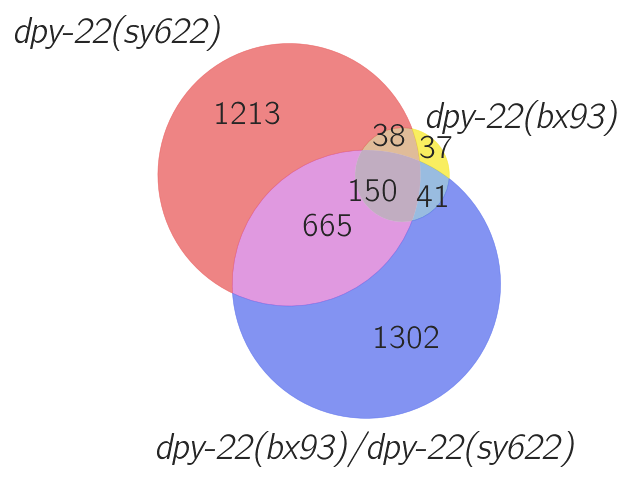

In [61]:
# labels for each big circle
labels = ('\emph{dpy-22(sy622)}', '\emph{dpy-22(bx93)}',
          '\emph{dpy-22(bx93)/dpy-22(sy622)}')

# venn diagram:
v = vplt.venn3(subsets=(sy622, bx93, sy622_bx93,het, sy622_het, bx93_het,
                        triple),
               set_labels = labels)

# color venn diagram
v.get_patch_by_id('100').set_color('#E85050')
v.get_patch_by_id('010').set_color('#F7E71D')
v.get_patch_by_id('001').set_color('#4E66ED')

# set alpha
v.get_patch_by_id('100').set_alpha(.7)
v.get_patch_by_id('010').set_alpha(.7)
v.get_patch_by_id('001').set_alpha(.7)

# fix fonts
for text in v.set_labels:
    text.set_fontsize(18)
for text in v.subset_labels:
    text.set_fontsize(16)

# save
plt.savefig('../output/venn_diagram.svg', bbox_inches='tight')